In [1]:
!pip install yfinance
!pip install mpl-finance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.3 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Define a list of cryptocurrency tickers
tickers = ["BTC-USD"]

# Define start and end dates
end_date = datetime.today().strftime('%Y-%m-%d')
days=7*12
start_date = (datetime.today() - timedelta(days=days)).strftime('%Y-%m-%d')

# Download the data from Yahoo Finance
df = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Flatten the multi-index columns and rename them
df = df.rename(columns={"Adj Close": "BTC"})

# Reset the index to make the date a separate column
df = df.reset_index()

# Print the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,BTC,Volume
0,2023-03-01,23150.929688,23880.632812,23088.626953,23646.550781,23646.550781,24662841200
1,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
2,2023-03-03,23476.632812,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
4,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'BTC', 'Volume'], dtype='object')

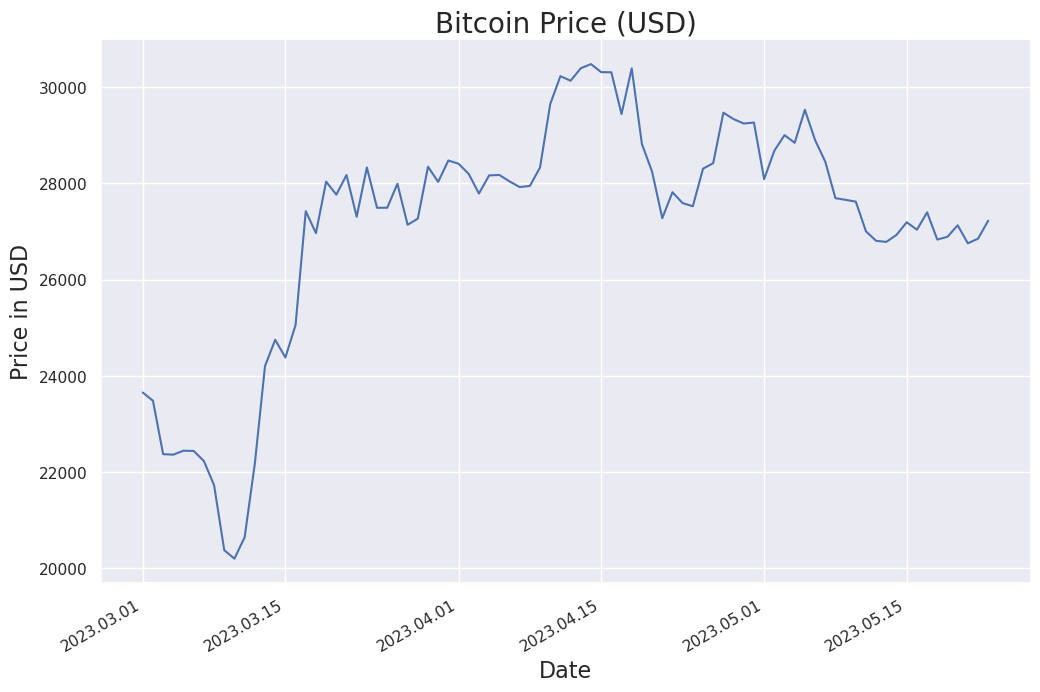

In [5]:
# Convert date column to a matplotlib-compatible format
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

# Set the style of the plot
sns.set(style="darkgrid")

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plot the line chart
sns.lineplot(x='Date_mpl', y='BTC', data=df, ax=ax)

# Set the x-axis label and format
ax.set_xlabel('Date', fontsize=16)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()

# Set the y-axis label and title
ax.set_ylabel('Price in USD', fontsize=16)
ax.set_title('Bitcoin Price (USD)', fontsize=20)

# Show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


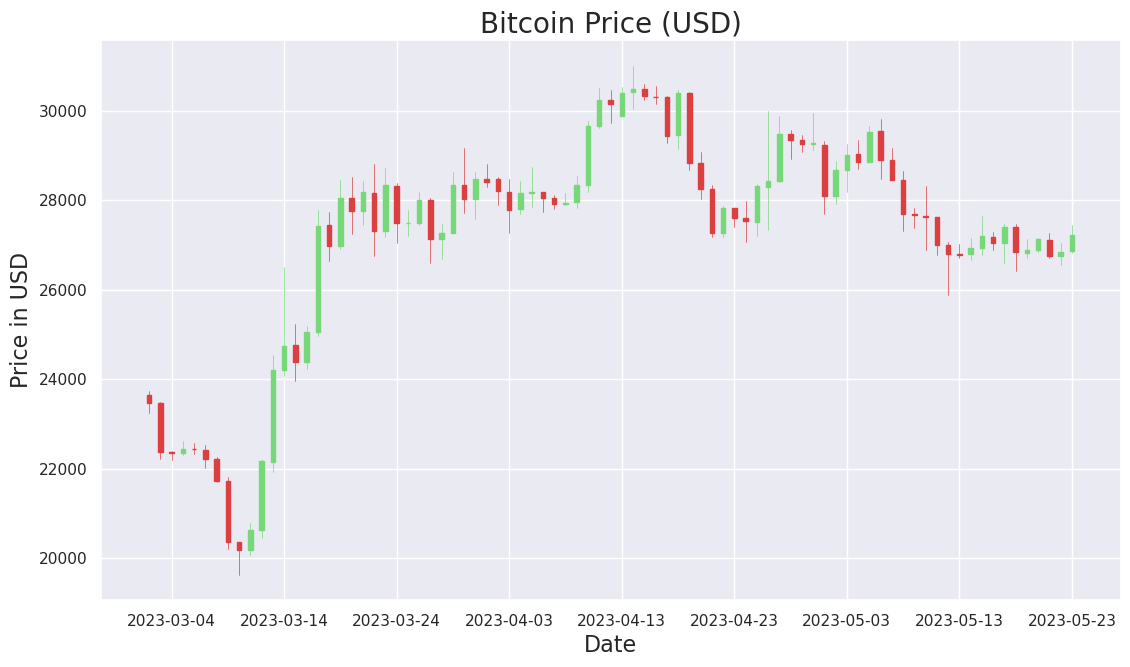

In [6]:
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc

# Convert date column to a matplotlib-compatible format
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))

# Create a new dataframe with data from the days
temp_df = df[df['Date']>(datetime.today() - timedelta(days=days))]

ohlc = []
for ind, row in temp_df.iterrows():
    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))


plt.xlabel("Date", fontsize=16)
plt.ylabel("Price in USD", fontsize=16)
plt.title("Bitcoin Price (USD)", fontsize=20)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

In [7]:
# Visualize the data using Plotly Express
fig = px.line(df, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Price'},
              title='Price Over Time')
fig.update_layout(font_size=15, font_color='black', legend_title_text='Parameters')
fig.show()

In [8]:
# Convert date to a numerical value
df['Date'] = df['Date'].dt.year*10000 + df['Date'].dt.month*100 + df['Date'].dt.day

In [9]:
df.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
BTC         0
Volume      0
Date_mpl    0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'BTC', 'Volume', 'Date_mpl'], dtype='object')

In [12]:
df = df.drop(["Date_mpl"], axis=1)
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'BTC', 'Volume'], dtype='object')

In [13]:
# Define the target column as "BTC"
target = df["BTC"]

# Define the feature columns as all the columns except "Date" and "BTC"
features = df.drop(["BTC"], axis=1)

In [14]:
# Create a 80/20 training and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Generate a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [15]:
linReg_confidence = model.score(X_test,y_test)
print("Linear Regression Confidence: ",linReg_confidence)
print(linReg_confidence*100,'%')

Linear Regression Confidence:  1.0
100.0 %


In [16]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on the testing data
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Use the model to predict the next day's price
last_day_data = df.tail(1)
next_day_data = [[last_day_data['Open'].values[0], last_day_data['High'].values[0],
                  last_day_data['Low'].values[0], last_day_data['Close'].values[0],
                  last_day_data['BTC'].values[0], last_day_data['Volume'].values[0]]]
next_day_price = model.predict(next_day_data)
print('Next day price:', next_day_price[0])

Mean Squared Error: 1.4013412730310116e-23
Next day price: 27225.72656229867


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

